In [1]:
# Import pacakages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Where the data comes from
# Country Codes with Continent https://gist.github.com/stevewithington/20a69c0b6d2ff846ea5d35e5fc47f26c 
# Minimized Data 1960-2050 https://databank.worldbank.org/reports.aspx?source=Health%20Nutrition%20and%20Population%20Statistics%3A%20Population%20estimates%20and%20projections
#     Here all countries and times were selected however when considering the series
#     we removed the % based data of the population for males and females. This is due
#     to the download limitations of the csv file cells on their website.

In [3]:
# The multiple mark down cells below have been archived as running it is time consuming and all it outputs
# is the csv file containing the data we will use. 
#
# Be aware the file we use will be a mix of two csv files that of continents codes and country data

In [4]:
#data_1960_2050 = pd.read_csv('./Datasets/Minimized Data 1960-2050.csv', low_memory=False)
#CCwC = pd.read_csv('./Datasets/Country Codes with Continent.csv', low_memory=False)
#
#data_1960_2050.insert(0, "Continent_Name", np.nan)
#data_1960_2050.insert(0, "Continent_Code", np.nan)
#data_1960_2050.insert(0, "Country_Number", np.nan)

In [5]:
#i = 1960
#string = ["Continent_Name", "Continent_Code", "Country_Number", "Country_Name", "Country_Code", "Series_Name", "Series_Code"]
#while i != 2051:
#    temp = "[" + str(i) + "]"
#    string.append(temp)
#    i = i + 1
#    
#data_1960_2050.columns = string

In [6]:
#for x in range(len(data_1960_2050)):
#    i = 90 # Length of Data set per country
#    for y in range(len(CCwC)):
#        if(data_1960_2050.loc[x, "Country_Code"] == CCwC.loc[y, "Three_Letter_Country_Code"]):
#            if(i != 0):
#                data_1960_2050.loc[x, "Continent_Name"] = CCwC.loc[y, "Continent_Name"]
#                data_1960_2050.loc[x, "Continent_Code"] = CCwC.loc[y, "Continent_Code"]
#                data_1960_2050.loc[x, "Country_Number"] = CCwC.loc[y, "Country_Number"]
#                i = i - 1

In [7]:
#data_1960_2050.to_csv('Population Data 1960-2050.csv', na_rep='NA') 

In [8]:
pop_data = pd.read_csv('./Datasets/Population Data 1960-2050.csv', low_memory=False)
pop_data = pop_data.replace('..', np.nan)
pop_data = pop_data.iloc[: , 1:] # Remove unnecessary column

In [9]:
pop_data.head()

Continent_Name Continent_Code  Country_Number Country_Name Country_Code  \
0           Asia             AS             4.0  Afghanistan          AFG   
1           Asia             AS             4.0  Afghanistan          AFG   
2           Asia             AS             4.0  Afghanistan          AFG   
3           Asia             AS             4.0  Afghanistan          AFG   
4           Asia             AS             4.0  Afghanistan          AFG   

                                         Series_Name     Series_Code  \
0  Age dependency ratio (% of working-age populat...     SP.POP.DPND   
1                          Age dependency ratio, old  SP.POP.DPND.OL   
2                        Age dependency ratio, young  SP.POP.DPND.YG   
3                                      Net migration     SM.POP.NETM   
4                  Number of deaths ages 10-14 years     SH.DTH.1014   

        [1960]       [1961]       [1962]  ...       [2041]       [2042]  \
0  81.61726559  82.68867813  83.28937027  ...  52.72164136  51.97328642   
1  5.082213555  5.130138751  5.139641043  ...  6.229104518  6.383743014   
2  76.53505204  77.55853938  78.14972922  ...  46.49253685  45.58954341   
3          NaN          NaN       -20000  ...          NaN      -311082   
4          NaN          NaN          NaN  ...          NaN          NaN   

        [2043]       [2044]       [2045]       [2046]       [2047]  \
0   51.2542814  50.56495286   49.9052725  49.30917015  48.73585079   
1  6.546271532  6.718560434  6.902432897  7.103865914  7.312558214   
2  44.70800987  43.84639242   43.0028396  42.20530424  41.42329258   
3          NaN          NaN          NaN          NaN      -310076   
4          NaN          NaN          NaN          NaN          NaN   

        [2048]       [2049]       [2050]  
0  48.18515132  47.65691464  47.15251821  
1  7.528320998   7.74944603  7.976487074  
2  40.65683032  39.90746861  39.17603113  
3          NaN          NaN          NaN  
4          NaN          NaN          NaN  

[5 rows x 98 columns]

In [10]:
non_nation_str = ["Arab World", "High income", "IBRD only", "IDA & IBRD total", "IDA blend", "IDA only", "IDA total", "Late-demographic dividend", "Post-demographic dividend", "Sub-Saharan Africa", "Upper middle income","World", "Africa Eastern and Southern", "Africa Western and Central", "Central Europe and the Baltics", "Early-demographic dividend", "East Asia & Pacific", "East Asia & Pacific (excluding high income)", "East Asia & Pacific (IDA & IBRD countries)", "Euro area", "Europe & Central Asia", "Europe & Central Asia (excluding high income)", "Europe & Central Asia (IDA & IBRD countries)", "European Union", "Fragile and conflict affected situations", "Heavily indebted poor countries (HIPC)", "Latin America & Caribbean", "Latin America & Caribbean (excluding high income)", "Latin America & the Caribbean (IDA & IBRD countries)", "Least developed countries: UN classification", "Low & middle income", "Low income", "Lower middle income", "Middle East & North Africa", "Middle East & North Africa (excluding high income)", "Middle East & North Africa (IDA & IBRD countries)", "Middle income", "Not classified", "OECD members", "Other small states", "Pre-demographic dividend", "Small states", "South Asia", "South Asia (IDA & IBRD)", "Sub-Saharan Africa (excluding high income)", "Sub-Saharan Africa (IDA & IBRD countries)"]
nation_data = pop_data[~pop_data.Country_Name.isin(non_nation_str)]
non_nation_data = pop_data[pop_data.Country_Name.isin(non_nation_str)]
non_nation_data = non_nation_data.iloc[: , 3:] # Removing Continent Codes for non-Nations (Will be NA anyway)

In [11]:
nation_data.head()

Continent_Name Continent_Code  Country_Number Country_Name Country_Code  \
0           Asia             AS             4.0  Afghanistan          AFG   
1           Asia             AS             4.0  Afghanistan          AFG   
2           Asia             AS             4.0  Afghanistan          AFG   
3           Asia             AS             4.0  Afghanistan          AFG   
4           Asia             AS             4.0  Afghanistan          AFG   

                                         Series_Name     Series_Code  \
0  Age dependency ratio (% of working-age populat...     SP.POP.DPND   
1                          Age dependency ratio, old  SP.POP.DPND.OL   
2                        Age dependency ratio, young  SP.POP.DPND.YG   
3                                      Net migration     SM.POP.NETM   
4                  Number of deaths ages 10-14 years     SH.DTH.1014   

        [1960]       [1961]       [1962]  ...       [2041]       [2042]  \
0  81.61726559  82.68867813  83.28937027  ...  52.72164136  51.97328642   
1  5.082213555  5.130138751  5.139641043  ...  6.229104518  6.383743014   
2  76.53505204  77.55853938  78.14972922  ...  46.49253685  45.58954341   
3          NaN          NaN       -20000  ...          NaN      -311082   
4          NaN          NaN          NaN  ...          NaN          NaN   

        [2043]       [2044]       [2045]       [2046]       [2047]  \
0   51.2542814  50.56495286   49.9052725  49.30917015  48.73585079   
1  6.546271532  6.718560434  6.902432897  7.103865914  7.312558214   
2  44.70800987  43.84639242   43.0028396  42.20530424  41.42329258   
3          NaN          NaN          NaN          NaN      -310076   
4          NaN          NaN          NaN          NaN          NaN   

        [2048]       [2049]       [2050]  
0  48.18515132  47.65691464  47.15251821  
1  7.528320998   7.74944603  7.976487074  
2  40.65683032  39.90746861  39.17603113  
3          NaN          NaN          NaN  
4          NaN          NaN          NaN  

[5 rows x 98 columns]

In [12]:
non_nation_data.head()

Country_Name Country_Code  \
630   Arab World          ARB   
631   Arab World          ARB   
632   Arab World          ARB   
633   Arab World          ARB   
634   Arab World          ARB   

                                           Series_Name     Series_Code  \
630  Age dependency ratio (% of working-age populat...     SP.POP.DPND   
631                          Age dependency ratio, old  SP.POP.DPND.OL   
632                        Age dependency ratio, young  SP.POP.DPND.YG   
633                                      Net migration     SM.POP.NETM   
634                  Number of deaths ages 10-14 years     SH.DTH.1014   

          [1960]       [1961]       [1962]       [1963]       [1964]  \
630  88.06112205  89.48951082  90.78245588  91.89895004  92.72800614   
631  6.591954083  6.700900744  6.793279719   6.86732593  6.919221517   
632  81.32419598  82.62619759  83.78915992  84.76735571  85.47420925   
633          NaN          NaN      -499808          NaN          NaN   
634          NaN          NaN          NaN          NaN          NaN   

          [1965]  ...       [2041]       [2042]       [2043]       [2044]  \
630  93.20129301  ...  54.24417831  54.35633232  54.50222185  54.67715582   
631  6.947790747  ...   12.9750649  13.34755109  13.73495183  14.13512864   
632  85.87297471  ...  40.75489812  40.53974232  40.34305586  40.16064571   
633          NaN  ...          NaN      -868781          NaN          NaN   
634          NaN  ...          NaN          NaN          NaN          NaN   

          [2045]       [2046]       [2047]       [2048]       [2049]  \
630  54.87496501  55.10350899  55.33361415  55.56434222  55.79153469   
631  14.54700573  14.94893527  15.35204254  15.75889415  16.17198167   
632  39.98566225  39.84387378  39.69802407  39.54519654   39.3796137   
633          NaN          NaN      -868273          NaN          NaN   
634          NaN          NaN          NaN          NaN          NaN   

          [2050]  
630  56.01206563  
631  16.59305029  
632  39.19644646  
633          NaN  
634          NaN  

[5 rows x 95 columns]

In [13]:
pop_totals = nation_data[nation_data.Series_Code == "SP.POP.TOTL"] #Population Totals
pop_growth = nation_data[nation_data.Series_Code == "SP.POP.GROW"] #Population Growth
pop_migration = nation_data[nation_data.Series_Code == "SM.POP.NETM"] #Net Migration

world_total = non_nation_data[non_nation_data.Series_Code == "SP.POP.TOTL"]
world_total = world_total[world_total.Country_Code == "WLD"]

world_growth = non_nation_data[non_nation_data.Series_Code == "SP.POP.GROW"]
world_growth = world_growth[world_growth.Country_Code == "WLD"]

male_totals = nation_data[nation_data.Series_Code == "SP.POP.TOTL.MA.IN"] #Male Population
female_totals = nation_data[nation_data.Series_Code == "SP.POP.TOTL.FE.IN"] #Female Population
rural_totals = nation_data[nation_data.Series_Code == "SP.RUR.TOTL"] #Rural Population Total
urban_totals = nation_data[nation_data.Series_Code == "SP.URB.TOTL"] #Urban Population Total

In [14]:
pop_totals.head()

Continent_Name Continent_Code  Country_Number    Country_Name  \
62            Asia             AS             4.0     Afghanistan   
152         Europe             EU             8.0         Albania   
242         Africa             AF            12.0         Algeria   
332        Oceania             OC            16.0  American Samoa   
422         Europe             EU            20.0         Andorra   

    Country_Code        Series_Name  Series_Code    [1960]    [1961]  \
62           AFG  Population, total  SP.POP.TOTL   8996967   9169406   
152          ALB  Population, total  SP.POP.TOTL   1608800   1659800   
242          DZA  Population, total  SP.POP.TOTL  11057864  11336336   
332          ASM  Population, total  SP.POP.TOTL     20127     20605   
422          AND  Population, total  SP.POP.TOTL     13410     14378   

       [1962]  ...    [2041]    [2042]    [2043]    [2044]    [2045]  \
62    9351442  ...  57748000  58574000  59387000  60188000  60974000   
152   1711319  ...   2571000   2550000   2529000   2508000   2486000   
242  11619828  ...  56174000  56711000  57250000  57789000  58326000   
332     21246  ...     54000     54000     54000     54000     54000   
422     15379  ...     78000     78000     78000     77000     77000   

       [2046]    [2047]    [2048]    [2049]    [2050]  
62   61746000  62503000  63245000  63972000  64683000  
152   2465000   2443000   2421000   2399000   2377000  
242  58859000  59388000  59911000  60423000  60923000  
332     54000     54000     54000     54000     54000  
422     77000     77000     77000     76000     76000  

[5 rows x 98 columns]

In [15]:
world_total.head()

Country_Name Country_Code        Series_Name  Series_Code      [1960]  \
20582        World          WLD  Population, total  SP.POP.TOTL  3032156070   

           [1961]      [1962]      [1963]      [1964]      [1965]  ...  \
20582  3071596055  3124561005  3189655687  3255145692  3322046795  ...   

           [2041]      [2042]      [2043]      [2044]      [2045]      [2046]  \
20582  9201714000  9259081000  9315314000  9370366000  9424214000  9476828000   

           [2047]      [2048]      [2049]      [2050]  
20582  9528225000  9578391000  9627322000  9674665000  

[1 rows x 95 columns]

In [16]:
world_growth.head()

Country_Name Country_Code                   Series_Name  Series_Code  \
20577        World          WLD  Population growth (annual %)  SP.POP.GROW   

      [1960]       [1961]       [1962]       [1963]       [1964]       [1965]  \
20577    NaN  1.300724108  1.724346205  2.083322486  2.053199826  2.055241434   

       ...       [2041]       [2042]       [2043]       [2044]       [2045]  \
20577  ...  0.639752735  0.623438199  0.607328092  0.590983836  0.574662719   

            [2046]       [2047]       [2048]       [2049]      [2050]  
20577  0.558285285  0.542343915  0.526498902  0.510847803  0.49175669  

[1 rows x 95 columns]

In [17]:
print(pop_totals.Country_Name.tolist()) # Someone should double check I have not included an accidental non-country

['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Caribbean small states', 'Cayman Islands', 'Central African Republic', 'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Faroe Islands', 'Fiji', 'Finland', 'France', 'French Polynesia', 'Gabon', 'Gambia, The

In [18]:
print(pop_data.dtypes)

Continent_Name     object
Continent_Code     object
Country_Number    float64
Country_Name       object
Country_Code       object
                   ...   
[2046]             object
[2047]             object
[2048]             object
[2049]             object
[2050]             object
Length: 98, dtype: object


In [19]:
def preparePlot(dataframe): #We can use this method to plot individual plots (Can be expanded to be more automated)
    string = dataframe['Country_Name'].tolist()
    dataframe = dataframe.T
    dataframe = dataframe.iloc[8:]
    dataframe = dataframe.astype('float64')
    dataframe.columns = string
    return dataframe

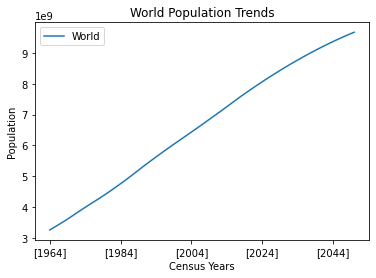

In [20]:
world_total_plot = preparePlot(world_total)
world_total_plot.plot(title = "World Population Trends")
plt.ylabel("Population")
plt.xlabel("Census Years")
plt.legend(["World"])

In [21]:
world_growth.head()

Country_Name Country_Code                   Series_Name  Series_Code  \
20577        World          WLD  Population growth (annual %)  SP.POP.GROW   

      [1960]       [1961]       [1962]       [1963]       [1964]       [1965]  \
20577    NaN  1.300724108  1.724346205  2.083322486  2.053199826  2.055241434   

       ...       [2041]       [2042]       [2043]       [2044]       [2045]  \
20577  ...  0.639752735  0.623438199  0.607328092  0.590983836  0.574662719   

            [2046]       [2047]       [2048]       [2049]      [2050]  
20577  0.558285285  0.542343915  0.526498902  0.510847803  0.49175669  

[1 rows x 95 columns]

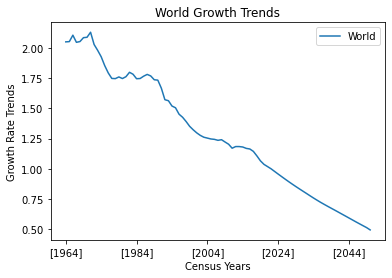

In [22]:
world_growth_plot = preparePlot(world_growth)
world_growth_plot.plot(title = "World Growth Trends")
plt.ylabel("Growth Rate Trends")
plt.xlabel("Census Years")
plt.legend(["World"])

In [23]:
pop_migration.head(50)

Continent_Name Continent_Code  Country_Number              Country_Name  \
3              Asia             AS             4.0               Afghanistan   
93           Europe             EU             8.0                   Albania   
183          Africa             AF            12.0                   Algeria   
273         Oceania             OC            16.0            American Samoa   
363          Europe             EU            20.0                   Andorra   
453          Africa             AF            24.0                    Angola   
543   North America            NaN            28.0       Antigua and Barbuda   
723   South America             SA            32.0                 Argentina   
813            Asia             AS            51.0                   Armenia   
903   North America            NaN           533.0                     Aruba   
993         Oceania             OC            36.0                 Australia   
1083         Europe             EU            40.0                   Austria   
1173           Asia             AS            31.0                Azerbaijan   
1263  North America            NaN            44.0              Bahamas, The   
1353           Asia             AS            48.0                   Bahrain   
1443           Asia             AS            50.0                Bangladesh   
1533  North America            NaN            52.0                  Barbados   
1623         Europe             EU           112.0                   Belarus   
1713         Europe             EU            56.0                   Belgium   
1803  North America            NaN            84.0                    Belize   
1893         Africa             AF           204.0                     Benin   
1983  North America            NaN            60.0                   Bermuda   
2073           Asia             AS            64.0                    Bhutan   
2163  South America             SA            68.0                   Bolivia   
2253         Europe             EU            70.0    Bosnia and Herzegovina   
2343         Africa             AF            72.0                  Botswana   
2433  South America             SA            76.0                    Brazil   
2523  North America            NaN            92.0    British Virgin Islands   
2613           Asia             AS            96.0         Brunei Darussalam   
2703         Europe             EU           100.0                  Bulgaria   
2793         Africa             AF           854.0              Burkina Faso   
2883         Africa             AF           108.0                   Burundi   
2973         Africa             AF           132.0                Cabo Verde   
3063           Asia             AS           116.0                  Cambodia   
3153         Africa             AF           120.0                  Cameroon   
3243  North America            NaN           124.0                    Canada   
3333            NaN            NaN             NaN    Caribbean small states   
3423  North America            NaN           136.0            Cayman Islands   
3513         Africa             AF           140.0  Central African Republic   
3603         Africa             AF           148.0                      Chad   
3693            NaN            NaN             NaN           Channel Islands   
3783  South America             SA           152.0                     Chile   
3873           Asia             AS           156.0                     China   
3963  South America             SA           170.0                  Colombia   
4053         Africa             AF           174.0                   Comoros   
4143         Africa             AF           180.0          Congo, Dem. Rep.   
4233         Africa             AF           178.0               Congo, Rep.   
4323  North America            NaN           188.0                Costa Rica   
4413         Africa             AF           384.0             Cote d'Ivoire   
4503 

Text(0.5, 1.0, 'Net Migration by Country')

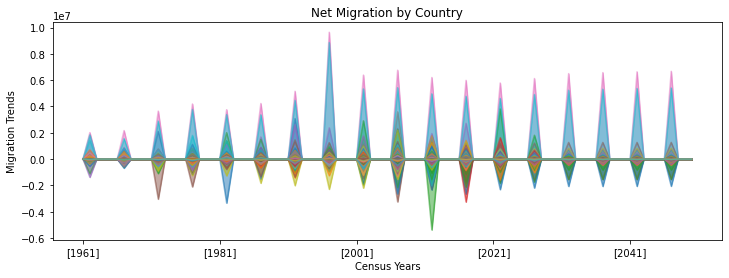

In [24]:
migration_plot = preparePlot(pop_migration)
fig, axs = plt.subplots(figsize=(12, 4))  
migration_plot.plot.area(ax = axs, stacked = False)
axs.get_legend().remove()
axs.set_xlabel("Census Years")
axs.set_ylabel("Migration Trends")
axs.set_title("Net Migration by Country")

In [25]:
# We can cut off the data from some year and attempt to predict the remaining data?
# Can we develop a column for What continent they are on using their country code.